**MODULE 1: LOAD DATA**

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import os

df = pd.read_csv("//all_exoplanets_2021.csv")
print("Columns in DataFrame:", df.columns.tolist())

cols = [
    "Planet Name",
    "Mass",
    "Orbital Period Days",
    "Equilibrium Temperature",
    "Spectral Type",
    "Stellar Effective Temperature",
    "Stellar Mass",
    "Stellar Metallicity"
]

df = df[cols]
print("Data shape:", df.shape)
df.head()

Columns in DataFrame: ['No.', 'Planet Name', 'Planet Host', 'Num Stars', 'Num Planets', 'Discovery Method', 'Discovery Year', 'Discovery Facility', 'Orbital Period Days', 'Orbit Semi-Major Axis', 'Mass', 'Eccentricity', 'Insolation Flux', 'Equilibrium Temperature', 'Spectral Type', 'Stellar Effective Temperature', 'Stellar Radius', 'Stellar Mass', 'Stellar Metallicity', 'Stellar Metallicity Ratio', 'Stellar Surface Gravity', 'Distance', 'Gaia Magnitude']
Data shape: (4575, 8)


,Planet Name,Mass,Orbital Period Days,Equilibrium Temperature,Spectral Type,Stellar Effective Temperature,Stellar Mass,Stellar Metallicity
0,11 Com b,6165.6000,326.03000,NaN,G8 III,4742.0,2.70,-0.35
1,11 UMi b,4684.8142,516.21997,NaN,NaN,4213.0,2.78,-0.02
2,14 And b,1525.5000,185.84000,NaN,K0 III,4813.0,2.20,-0.24
3,14 Her b,1481.0878,1773.40002,NaN,NaN,5338.0,0.90,0.41
4,16 Cyg B b,565.7374,798.50000,NaN,NaN,5750.0,1.08,0.06


**CLEAN DATA**

In [6]:
df.fillna(df.median(numeric_only=True), inplace=True)
df["Spectral Type"].fillna("Unknown", inplace=True)

df = pd.get_dummies(df, columns=["Spectral Type"])

/tmp/ipython-input-3925955471.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Spectral Type"].fillna("Unknown", inplace=True)


**FEATURE ENGINEERING**

In [7]:
df["habitability_index"] = (
    (df["Equilibrium Temperature"].between(200, 350)).astype(int) +
    (df["Mass"] <= 10).astype(int)
)

df["stellar_index"] = (
    (df["Stellar Effective Temperature"].between(3000, 6000)).astype(int) +
    (df["Stellar Metallicity"] >= -0.5).astype(int)
)

**NORMALIZATION**

In [8]:
scaler = MinMaxScaler()
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = scaler.fit_transform(df[num_cols])

**SAVE CLEAN DATA**

In [9]:
os.makedirs("data", exist_ok=True)
df.to_csv("/content/exoplanets_cleaned.csv", index=False)
print("Clean dataset saved")


Clean dataset saved


Module 3: Machine Learning Dataset Preparation

In [17]:
df["habitability_class"] = (df["habitability_index"] >= 0.5).astype(int)

# Drop non-numeric columns and the target variable
X = df.drop(["habitability_class", "Planet Name"], axis=1)
y = df["habitability_class"]

X_numeric = X.select_dtypes(include=np.number)


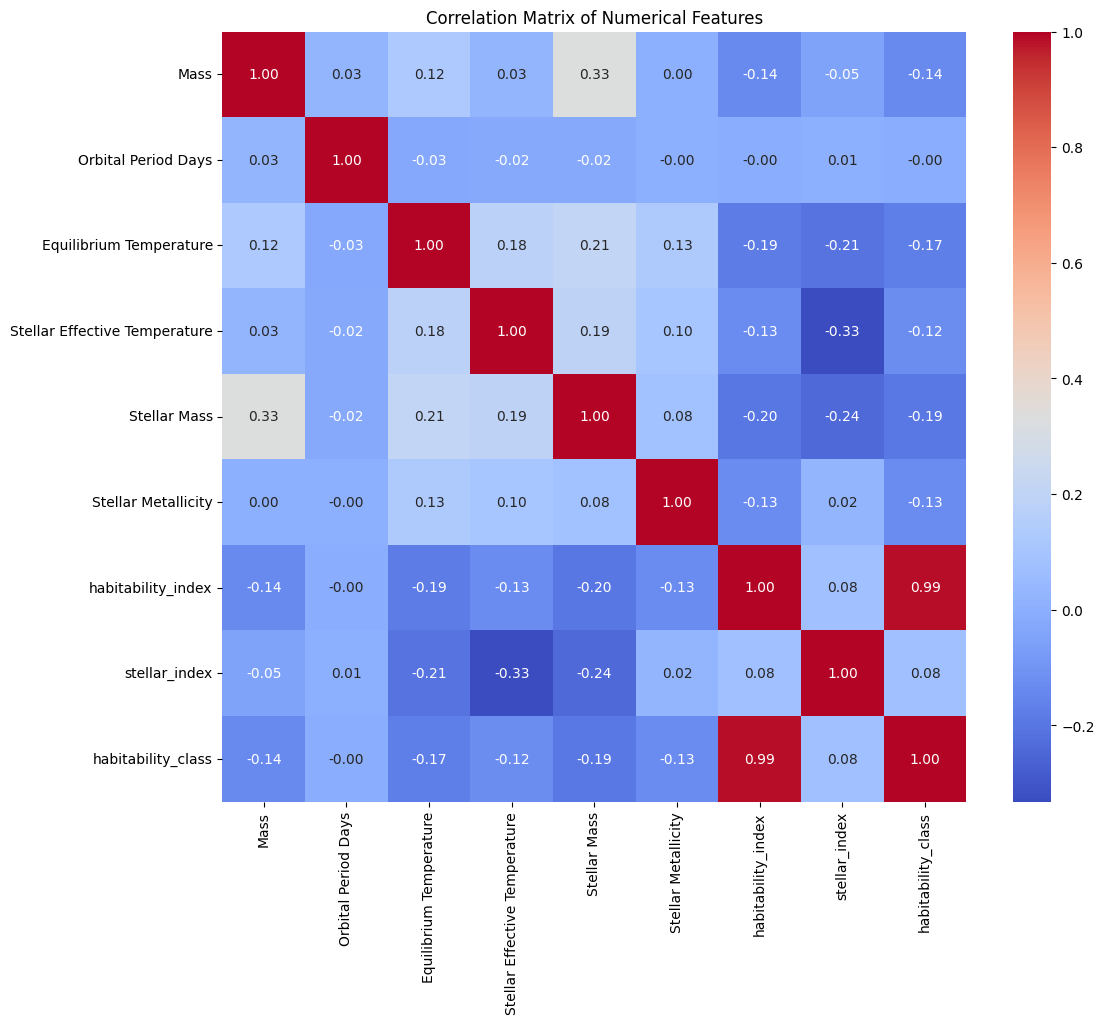

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for correlation calculation
num_cols = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = num_cols.corr()

# Display the correlation matrix using a heatmap for better visualization
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Select Features**



In [16]:
#Calculate correlation with 'habitability_index' from the numeric subset
corr = X_numeric.corr()["habitability_index"].abs().sort_values(ascending=False)
selected_features = corr[corr > 0.2].index.tolist()

# Filter X to only include the selected numeric features
X = X[selected_features]

**Train–Test split sizes**

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

pipeline = Pipeline([
    ("scaler", StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (3660, 189)
Testing set shape: (915, 189)
